# Machine Learning flow (To predict RunTime)
## Import relevant libraries and dataset
 - Dataset is created by PNRdatabase jupyter notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv('PNRdatabase3.csv') # load dataset (csv file) with pandas

# ignore unimportant warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Define features (X) and targets (y/z)
 - Define X as feature columns
 - Define y as target column RunTimeRoute
 - Define z as target column RunTimePlace

In [2]:
# Drop all columns which will not be used in machine learning model, leaving feature and target columns
train = data.drop(['Violations','AntennaViolations','Type40LP','MetalStack','Date','RowDirection','DoubleBack','FlipFirstRow','StartfromFirstRow'],axis=1)

# Drop target columns, leaving feature columns
X = train.drop(['RunTimeRoute','RunTimePlace'],axis=1)

# Define y and z to be target columns
y = train['RunTimeRoute']
z = train['RunTimePlace']

## Look at distribution of targets
 - Check for presence of possible outliers

Text(0.5, 1.0, 'Distribution of RunTimePlace')

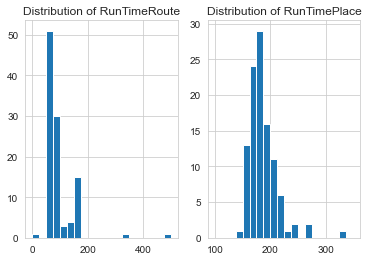

In [3]:
sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.hist(y, range=(0, 500), bins=20)
ax2.hist(z, range=(100, 350), bins=20)
ax1.set_title('Distribution of RunTimeRoute')
ax2.set_title('Distribution of RunTimePlace')

## Find Outliers
 - seaborn boxplot function shows distribution of data
 - box shows quartiles of dataset while whiskers extend to the rest of the distribution, excluding points deemed as outliers by the function of the inter-quartile range

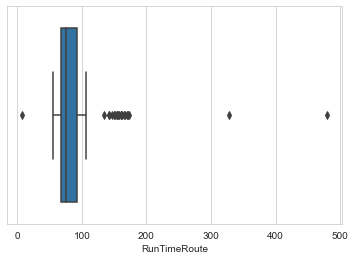

In [4]:
sns.boxplot(x=y)

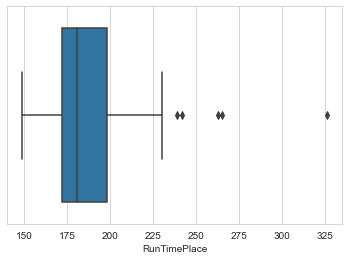

In [5]:
sns.boxplot(x=z)

In [6]:
# Derive inter-quartile ranges of both RunTimeRoute and RunTimePlace
Q1_y = y.quantile(0.25)
Q3_y = y.quantile(0.75)
IQR_y = Q3_y - Q1_y
Q1_z = z.quantile(0.25)
Q3_z = z.quantile(0.75)
IQR_z = Q3_z - Q1_z
print(IQR_y,IQR_z)

24.5 26.0


In [7]:
# Print all possible outliers of RunTimeRoute which are outside inter-quartile range
y_outliers = []
for i in range(len(y)):
    if y[i] < (Q1_y - 1.5 * IQR_y) or y[i] > (Q3_y + 1.5 * IQR_y):
        y_outliers.append(i)
        print(i,y[i])
print(len(y_outliers))

1 166
3 135
4 160
6 155
8 158
10 171
13 170
22 150
24 165
26 154
28 151
30 146
32 160
34 173
67 479
83 8
87 328
89 154
91 142
93 162
95 156
97 142
22


In [8]:
y_outliers = [83,67,87] # outliers do not include small cluster of data points on the right of box (see box plot of RunTimeRoute)

In [9]:
# Print all possible outliers of RunTimePlace which are outside inter-quartile range
z_outliers = []
for i in range(len(z)):
    if z[i] < (Q1_z - 1.5 * IQR_z) or z[i] > (Q3_z + 1.5 * IQR_z):
        z_outliers.append(i)
print(z_outliers)

[21, 27, 76, 85, 91]


## Remove Outliers
 - Plot histogram of distribution excluding outliers

Text(0.5, 1.0, 'Distribution of RunTimePlace')

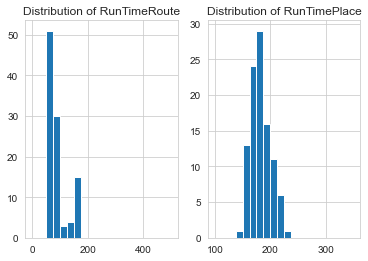

In [10]:
# drop outliers from all points
X_remove_outliers_route = X.drop(y_outliers)
X_remove_outliers_place = X.drop(z_outliers)
y_remove_outliers = y.drop(y_outliers)
z_remove_outliers = z.drop(z_outliers)

# plot histogram of distribution excluding outliers
sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.hist(y_remove_outliers, range=(0, 500), bins=20)
ax2.hist(z_remove_outliers, range=(100, 350), bins=20)
ax1.set_title('Distribution of RunTimeRoute')
ax2.set_title('Distribution of RunTimePlace')

## Standardize the data points to a normal distribution with mean 0 and variance 1
 - Necessary to ensure model assigns fair weight to features, without being affected by varying ranges and means of features

In [11]:
# convert pandas Dataframes to numpy arrays
# necessary to input into sklearn's StandardScaler
X_remove_outliers_route = X_remove_outliers_route.to_numpy()
X_remove_outliers_place = X_remove_outliers_place.to_numpy()
y_remove_outliers = y_remove_outliers.to_numpy()
z_remove_outliers = z_remove_outliers.to_numpy()

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X_place = StandardScaler()
sc_X_route = StandardScaler()
sc_Y = StandardScaler()
sc_Z = StandardScaler()
X_remove_outliers_place = sc_X_place.fit_transform(X_remove_outliers_place)
X_remove_outliers_route = sc_X_route.fit_transform(X_remove_outliers_route)
y_remove_outliers = sc_Y.fit_transform(y_remove_outliers.reshape(-1,1))
z_remove_outliers = sc_Z.fit_transform(z_remove_outliers.reshape(-1,1))
print(y_remove_outliers) # check that scaled RunTimeRoutes have a mean of 0

[[ 0.056275  ]
 [ 2.28563062]
 [-0.62739406]
 [ 1.36416363]
 [ 2.10728217]
 [-0.68684354]
 [ 1.95865846]
 [-0.47877035]
 [ 2.04783269]
 [-0.62739406]
 [ 2.43425433]
 [-0.59766932]
 [-0.71656829]
 [ 2.40452959]
 [-0.21124768]
 [-0.41932087]
 [-0.62739406]
 [-0.59766932]
 [-0.56794458]
 [-0.12207345]
 [-0.68684354]
 [-0.33014665]
 [ 1.81003475]
 [-0.6571188 ]
 [ 2.25590588]
 [-0.44904561]
 [ 1.92893372]
 [-0.24097242]
 [ 1.83975949]
 [-0.86519199]
 [ 1.69113579]
 [-0.38959613]
 [ 2.10728217]
 [-0.83546725]
 [ 2.49370381]
 [-0.35987139]
 [-0.44904561]
 [-0.1517982 ]
 [-0.47877035]
 [-0.03289923]
 [-0.59766932]
 [-0.38959613]
 [-0.56794458]
 [-0.44904561]
 [-0.6571188 ]
 [ 0.08599974]
 [-0.47877035]
 [-0.38959613]
 [-0.86519199]
 [-0.38959613]
 [-0.56794458]
 [-0.3004219 ]
 [-0.6571188 ]
 [-0.38959613]
 [-0.68684354]
 [-0.95436622]
 [-0.44904561]
 [-0.92464148]
 [-0.44904561]
 [-0.62739406]
 [-0.6571188 ]
 [-0.71656829]
 [-0.56794458]
 [-0.12207345]
 [-0.50849509]
 [-0.21124768]
 [-0.47877

In [13]:
# convert numpy arrays back to pandas Dataframes
X_remove_outliers_route = pd.DataFrame(X_remove_outliers_route)
X_remove_outliers_place = pd.DataFrame(X_remove_outliers_place)
y_remove_outliers = pd.DataFrame(y_remove_outliers)
z_remove_outliers = pd.DataFrame(z_remove_outliers)

In [14]:
# attach column names to pandas Dataframes (column names are lost when converted to numpy arrays)
X_remove_outliers_route.columns = ['layercount', 'LayerM1', 'LayerM2', 'LayerM3', 'LayerM4', 'LayerM5',
       'LayerM6', 'LayerM7', 'LayerL1', 'LayerL2', 'LayerL3', 'LayerL4',
       'LayerBA', 'LayerBB', 'LayerBD', 'LayerBE', 'LayerBG', 'LayerFA',
       'LayerFB', 'LayerU3T', 'LayerU3A', 'LayerLB', 'ViaCounts', 'NetCount',
       'RowCount', 'CoreUtil', 'CoreWidth', 'CoreHeight', 'AspectRatio']
X_remove_outliers_place.columns = ['layercount', 'LayerM1', 'LayerM2', 'LayerM3', 'LayerM4', 'LayerM5',
       'LayerM6', 'LayerM7', 'LayerL1', 'LayerL2', 'LayerL3', 'LayerL4',
       'LayerBA', 'LayerBB', 'LayerBD', 'LayerBE', 'LayerBG', 'LayerFA',
       'LayerFB', 'LayerU3T', 'LayerU3A', 'LayerLB', 'ViaCounts', 'NetCount',
       'RowCount', 'CoreUtil', 'CoreWidth', 'CoreHeight', 'AspectRatio']
y_remove_outliers.columns = ['RunTimeRoute']
z_remove_outliers.columns = ['RunTimePlace']

## Split dataset into train and test sets

In [15]:
from sklearn.model_selection import train_test_split

# split dataset into train set (80%) and test set (20%)
X_train_route, X_test_route, y_train, y_test = train_test_split(X_remove_outliers_route, y_remove_outliers, test_size=0.2,random_state=41)
X_train_place, X_test_place, z_train, z_test = train_test_split(X_remove_outliers_place, z_remove_outliers, test_size=0.2,random_state=41)

# check shape of pandas Dataframes (that train set is ~80% and test set is 20%)
print('X route shape:',X_remove_outliers_place.shape)
print('X place shape:',X_remove_outliers_route.shape)
print('y shape:',y_remove_outliers.shape)
print('z shape:',z_remove_outliers.shape)
print('X train route, X test route:',X_train_route.shape,X_test_route.shape)
print('X train place, X test place:',X_train_place.shape,X_test_place.shape)
print('y train, y test:',y_train.shape,y_test.shape)
print('z train, z test:',z_train.shape,z_test.shape)

X route shape: (101, 29)
X place shape: (103, 29)
y shape: (103, 1)
z shape: (101, 1)
X train route, X test route: (82, 29) (21, 29)
X train place, X test place: (80, 29) (21, 29)
y train, y test: (82, 1) (21, 1)
z train, z test: (80, 1) (21, 1)


## Select the best features with feature selection

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# function to return features with highest correlation to target
def select_columns(feature_cols,target_col,no_features=5):
    selector = SelectKBest(f_classif, k=no_features)
    X_new = selector.fit_transform(feature_cols,target_col)
    selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=X.columns)
    selected_columns = selected_features.columns[selected_features.var() != 0]
    return selected_columns

selected_columns_route = select_columns(train[X.columns],train['RunTimeRoute'],7)
selected_columns_place = select_columns(train[X.columns],train['RunTimePlace'],11)

# print list of features with highest correlation to target
print(selected_columns_place)
print(selected_columns_route)

Index(['layercount', 'LayerM1', 'LayerM2', 'LayerM3', 'LayerM4', 'LayerM5',
       'LayerL1', 'LayerFA', 'ViaCounts', 'NetCount', 'CoreWidth'],
      dtype='object')
Index(['layercount', 'LayerM2', 'LayerM3', 'LayerM4', 'LayerL1', 'ViaCounts',
       'NetCount'],
      dtype='object')


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Find best regression model from scikit-learn using k-fold cross validation
- Metrics used: root mean squared error
- number of folds: 10

In [17]:
from sklearn.linear_model import LinearRegression    
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor   
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

k=7

# list of regression models from sklearn
Regressors = [
    LinearRegression(),
    Ridge(max_iter=10000,random_state=k),
    Lasso(max_iter=10000,random_state=k),
    ElasticNet(max_iter=10000,random_state=k),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=k),
    SVR(max_iter=10000),
    GradientBoostingRegressor(random_state=k),
    RandomForestRegressor(random_state=k)
]

from sklearn.model_selection import cross_val_score

# initialize a high best score for RunTimeRoute and RunTimePlace
best_score_route = 100
best_score_place = 100

# loop through regression model list to find the best scores
for regressor in Regressors:
    cv_results_route = -cross_val_score(regressor, X_train_route[selected_columns_route], y_train.values.ravel(), scoring='neg_root_mean_squared_error', cv=10 )
    cv_results_place = -cross_val_score(regressor, X_train_place[selected_columns_place], z_train.values.ravel(), scoring='neg_root_mean_squared_error', cv=10 )
    if best_score_route > cv_results_route.mean():
        best_score_route = cv_results_route.mean()
        best_regressor_route = regressor
    if best_score_place > cv_results_place.mean():
        best_score_place = cv_results_place.mean()
        best_regressor_place = regressor

# print best score and regression model
print('best score (route) is: ',best_score_route)
print('best regressor (route) is: ',best_regressor_route)
        
print('best score (place) is: ',best_score_place)
print('best regressor (place) is: ',best_regressor_place)

best score (route) is:  0.4791159693430762
best regressor (route) is:  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
best score (place) is:  0.9304409336609376
best regressor (place) is:  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=10000, shrinking=True, tol=0.001, verbose=False)


## Tune model's hyperparameters with GridSearchCV/RandomizedSearchCV
 - After getting best values of hyperparameters, train and test best models with best values of hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# define values of hyperparameters to be used in RandomizedSearchCv
param_dist = {"max_depth": [3, None],
              "max_features": randint(0, 6),
              "min_samples_leaf": randint(1, 9)}

# fit model with train set and carry out RandomizedSearchCV for RunTimeRoute
XGB = GradientBoostingRegressor(random_state=11)
XGB_cv = RandomizedSearchCV(XGB, param_dist,scoring='neg_root_mean_squared_error', cv=10)
XGB_cv.fit(X_train_route[selected_columns_route],y_train.values.ravel())
print(XGB_cv.best_estimator_)
print(-XGB_cv.cv_results_['mean_test_score'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls',
                          max_depth=None, max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=11, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
[       nan 0.64819877 0.60229934 0.62240161 0.61495997        nan
        nan 0.61495997 0.62428011 0.60642871]


In [19]:
from sklearn import metrics

# Use tuned (best values) hyperparameters to train model with train set 
XGB_test = GradientBoostingRegressor(max_features=1,max_depth=3,min_samples_leaf=7,random_state=7)
XGB_test.fit(X_train_route,y_train.values.ravel())
y_pred = XGB_test.predict(X_test_route) # test model with test set
print(y_pred)
print(y_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[-0.55098809 -0.39557743  0.89998138 -0.30942252  0.34824901 -0.14066498
 -0.41516336 -0.18891799 -0.40387741 -0.52046573 -0.18891799  1.34811867
 -0.63712492 -0.45484566 -0.85007976 -0.36582499 -0.22823441 -0.03815777
 -0.36582499 -0.44745239 -0.03815777]
    RunTimeRoute
91      0.294073
68     -0.686844
6       1.958658
62     -0.567945
0       0.056275
40     -0.597669
49     -0.389596
95     -0.627394
60     -0.657119
63     -0.122073
69      0.086000
32      2.107282
27     -0.240972
25     -0.449046
48     -0.865192
2      -0.627394
33     -0.835467
99     -0.865192
37     -0.151798
16     -0.627394
79     -0.894917
0.5089169238425574


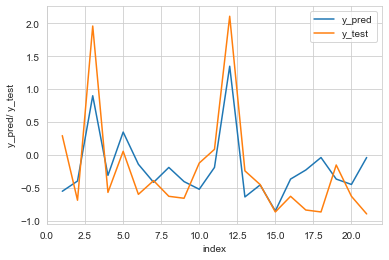

In [20]:
# plot graph of predited and actual values of RunTimeRoute
testlist = list(range(1,22))
plt.plot(testlist, y_pred)
plt.plot(testlist, y_test)
plt.xlabel('index')
plt.ylabel('y_pred/ y_test')
plt.legend(['y_pred','y_test'])

In [21]:
# define values of hyperparameters to be used in GridSearchCV
C_range = [1,10,100,1000,10000]
param_grid = dict(C= C_range)
svr = SVR(max_iter=10000)

# fit model with train set and carry out RandomizedSearchCV for RunTimePlace
search = GridSearchCV(estimator = svr, param_grid = param_grid, scoring='neg_root_mean_squared_error', cv=10)
search.fit(X_train_place[selected_columns_route],z_train.values.ravel())
print(search.best_estimator_)
print(-search.cv_results_['mean_test_score'])

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=10000, shrinking=True, tol=0.001, verbose=False)
[0.92845654 0.95175857 1.10585034 1.50242367 2.14567272]


In [22]:
# Use tuned (best values) hyperparameters to train model with train set 
svr_test = SVR(C=1,max_iter=10000)
svr_test.fit(X_train_place,z_train.values.ravel())
z_pred = svr_test.predict(X_test_place)
print(z_pred)
print(z_test)
print(np.sqrt(metrics.mean_squared_error(z_test, z_pred)))

[ 0.17232848 -0.3327352  -0.67792869  0.63965195  0.43495799 -0.4088251
 -0.18237813  0.65569287  0.00276126 -0.35037573 -0.3345724  -0.35626205
 -0.25624934 -0.14228733 -0.32051506 -0.69993989  0.40695716 -0.01471736
 -0.68488022 -0.38501897  0.22017648]
    RunTimePlace
90      0.195835
68      1.700180
6      -0.695629
62     -0.807062
0       0.864433
40     -0.194180
49      0.864433
94     -0.584196
60     -1.419943
63      1.365882
69     -0.862778
32      1.477314
27     -1.308510
25     -0.472763
48     -0.807062
2      -1.475660
33     -0.082747
97      1.254449
37      1.031583
16     -1.475660
79     -1.197077
1.1495497764032223


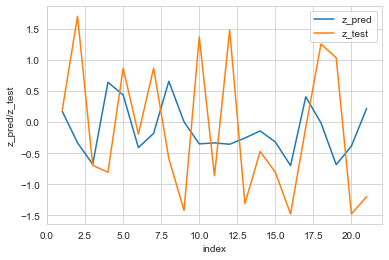

In [24]:
# plot graph of predited and actual values of RunTimePlace
testlist = list(range(1,22))
plt.plot(testlist, z_pred)
plt.plot(testlist, z_test)
plt.xlabel('index')
plt.ylabel('z_pred/z_test')
plt.legend(['z_pred','z_test'])